In [3]:
import pandas as pd
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, Dataset
from pathlib import Path

ParquetDataDir = r"C:/Users/johan/accent-benchmark/data/raw/Svarah/data"

c:\Users\johan\anaconda3\envs\accent-benchmark\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
parquet_files = list(Path(ParquetDataDir).rglob("*.parquet"))
print(f"Found {(parquet_files)} parquet files.")

Found [WindowsPath('C:/Users/johan/accent-benchmark/data/raw/Svarah/data/test-00000-of-00003.parquet'), WindowsPath('C:/Users/johan/accent-benchmark/data/raw/Svarah/data/test-00001-of-00003.parquet'), WindowsPath('C:/Users/johan/accent-benchmark/data/raw/Svarah/data/test-00002-of-00003.parquet')] parquet files.


In [ ]:
# Read the Parquet files into a Pandas DataFrame because it's straightforward
df_pandas = pd.concat([pd.read_parquet(str(file)) for file in parquet_files], ignore_index=True)

# Inspect column names
print(df_pandas.columns)  


Index(['audio_filepath', 'duration', 'text', 'gender', 'age-group',
       'primary_language', 'native_place_state', 'native_place_district',
       'highest_qualification', 'job_category', 'occupation_domain'],
      dtype='object')


In [ ]:
# Inspect first few rows
print(df_pandas.head())  

                                      audio_filepath  duration  \
0  {'bytes': b'RIFF\x14G\x04\x00WAVEfmt \x10\x00\...  8.759500   
1  {'bytes': b'RIFF\xa6\x83\x01\x00WAVEfmt \x10\x...  3.100062   
2  {'bytes': b'RIFFf8\x00\x00WAVEfmt \x10\x00\x00...  0.450062   
3  {'bytes': b'RIFFHT\x01\x00WAVEfmt \x10\x00\x00...  2.721125   
4  {'bytes': b'RIFF\xee\xcd\x01\x00WAVEfmt \x10\x...  3.694313   

                                                text  gender age-group  \
0  Our district Hasana was the land of the great ...  Female     18-30   
1          There is a gradual shift in the mentality  Female     30-45   
2                                                Wow  Female     18-30   
3                        Nipah virus belongs to  the  Female     45-60   
4  How much money is left in my Arunachal Pradesh...    Male     30-45   

  primary_language native_place_state native_place_district  \
0          Kannada          Karnataka                Hassan   
1          Kannada          Karn

In [ ]:
# Check for missing values in each column
df_pandas.isna().sum().sort_values(ascending=False)


audio_filepath           0
duration                 0
text                     0
gender                   0
age-group                0
primary_language         0
native_place_state       0
native_place_district    0
highest_qualification    0
job_category             0
occupation_domain        0
dtype: int64

In [ ]:
# Check for duplicate rows based on all columns except 'audio_filepath' since it contains dicts (unhashable)
df_pandas.drop(columns=['audio_filepath']).duplicated().sum()

np.int64(0)

In [18]:
# Check for non-finite values in the 'duration' column
df_pandas[~np.isfinite(df_pandas["duration"])]

,audio_filepath,duration,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain


In [ ]:
# Basic statistics of the 'duration' column
df_pandas.describe()

,duration
count,6656.000000
mean,5.200120
std,4.568625
min,0.098000
25%,1.815234
50%,4.208344
75%,7.200000
max,29.871063


In [ ]:
# Check for empty or whitespace-only strings in the 'text' column
df_pandas[df_pandas["text"].str.strip().eq("")]

,audio_filepath,duration,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain


In [ ]:
# Average number of words in the 'text' column
# Important because very short texts may not provide enough context for accent recognition
df_pandas["text"].str.split().str.len().mean()


np.float64(10.41436298076923)

<Axes: xlabel='duration', ylabel='Count'>

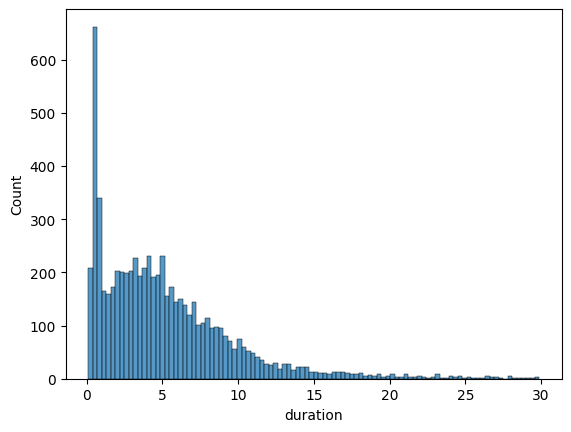

In [ ]:
# Plot histogram for all durations
sns.histplot(df_pandas["duration"], bins=100)
